In [4]:
import sys
sys.path.insert(1, '/home/maria/Documents/EnsemblePursuit')
from EnsemblePursuit.EnsemblePursuit import EnsemblePursuit
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, gaussian_filter1d
import seaborn as sns

In [2]:
data_path='/home/maria/Documents/data_for_suite2p/TX39/'
dt=1
spks= np.load(data_path+'spks.npy')
print('Shape of the data matrix, neurons by timepoints:',spks.shape)
iframe = np.load(data_path+'iframe.npy') # iframe[n] is the microscope frame for the image frame n
ivalid = iframe+dt<spks.shape[-1] # remove timepoints outside the valid time range
iframe = iframe[ivalid]
S = spks[:, iframe+dt]
U=np.load('U.npy')
input_patterns=S[np.nonzero(U[:,13])[0],:]
input_patterns=zscore(input_patterns,axis=1)
del spks
del S

Shape of the data matrix, neurons by timepoints: (18795, 30766)


In [3]:
weights=np.load('/media/maria/DATA1/Documents/Neocortex/SOC/soc.txt.npy')

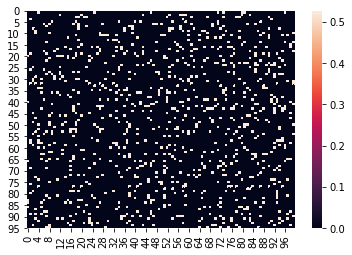

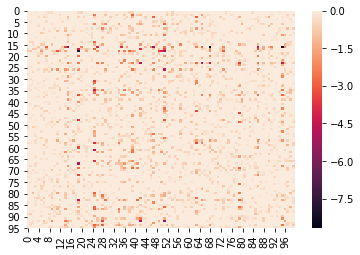

In [26]:
#Inhibitory sub-population
num_neurons=200
first_quadrant = np.arange(num_neurons/2)
second_quadrant = first_quadrant + num_neurons/2
first_quadrant=first_quadrant.astype('int')
second_quadrant=second_quadrant.astype('int')
W_IE = weights[np.ix_(second_quadrant,first_quadrant)]
W_II = weights[np.ix_(second_quadrant,second_quadrant)]
sns.heatmap(W_IE)
plt.show()
sns.heatmap(W_II)

(656, 30560)
(100, 1500)
[[ 1.6905257   1.72236812  1.74337747 ...  6.48533005  6.58956771
   6.62676118]
 [-0.46593737 -0.39426071 -0.3989927  ... -1.26457674 -1.17827416
  -1.18062842]
 [ 0.03282016  0.10748594  0.1773416  ... -1.48951705 -1.42898612
  -1.40818403]
 ...
 [ 0.86903933  0.93332208  0.95840288 ... -2.78967012 -2.70618245
  -2.66273013]
 [-0.34211702 -0.16239782 -0.07823147 ...  5.3460558   5.45442821
   5.4910239 ]
 [-0.47192665 -0.33029754 -0.27959073 ... -4.91013398 -4.91079928
  -4.91148611]]
5.615289e-10


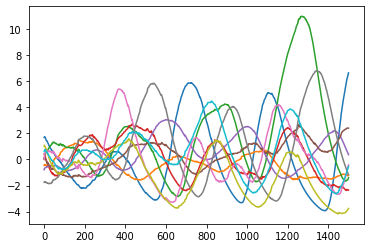

In [69]:
np.random.seed(7)
def gain_function(x):
    x[x<0]= 5*np.tanh(x[x<0]/5)
    '''
    if x<0:
        return 5*np.tanh(x/5)
    else:
        return (100-5)*np.tanh(x/(100-5))
    '''
    x[x>=0]=(100-5)*np.tanh(x[x>=0]/(100-5))
    return x
inh_weights=np.hstack((W_IE,W_II))
#inh_weights=np.random.normal(0,1,(100,200))
activity_pattern=[np.random.normal(0,1,(100,))]
print(input_patterns.shape)
h=0.01
for t in range(1,1500):
    #print(t)
    x=activity_pattern[-1].reshape(100,)
    #print('z',x.shape)
    inp=np.concatenate((input_patterns[:100,t].reshape(100,),x),axis=0)
    dxdt=(-x+gain_function(inh_weights@inp))
    #print('dxdt',dxdt.shape)
    activity_pattern.append(activity_pattern[-1]+h*dxdt.reshape(100,))
    #print(activity_pattern)
activity_patterns=np.array(activity_pattern).T
print(activity_patterns.shape)
print(activity_patterns)
plt.plot(activity_patterns[:10,:].T)
print(np.mean(input_patterns))